# Customer Churn Prediction for fitness center

- In thhis project I used the principles of machine learning;
- I predicted the probability of churn (at the next month's level) for each client;
- I performed cluster analysis to identify user portraits;
- I analysed the main features that most strongly influence the outflow of the clients.


**The dataset contains the following fields:**

'Churn' - the fact of churn in the current month;

Client data for the previous month before the churn check:

'gender' - gender;

'Near_Location' - living or working in the area where the fitness center is located;

'Partner' - an employee of the club's partner company (cooperation with companies whose employees can receive discounts on a subscription - in this case, the fitness center stores information about the client's employer);

Promo_friends - the fact of the initial registration as part of the “bring a friend” campaign (used a promo code from a friend when paying for the first subscription);

'Phone' - availability of a contact phone number;
'Age' - age;

'Lifetime' is the time since the first visit to the fitness center (in months).

**Information based on the history of visits, purchases and information about the current status of the client's subscription:**

'Contract_period' - duration of the current valid subscription (month, 3 months, 6 months, year);

'Month_to_end_contract' - period until the end of the current valid subscription (in months);

'Group_visits' - the fact of attending group classes;

'Avg_class_frequency_total' - the average frequency of visits per week for the entire time since the beginning of the subscription;

'Avg_class_frequency_current_month' - average frequency of visits per week for the previous month;

'Avg_additional_charges_total' - total revenue from other services of the fitness center: cafes, sports goods, beauty and massage parlor.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats as st
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/Users/yuliyapletneva/gym_churn.csv')

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

(4000, 14)

In [5]:
data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Looking at the average values of features in two groups - those who left and those who stayed

In [8]:
data.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Доля покинувших фитнес центр больше среди тех, кто не посещал групповые занятия, ходил реже, и недавно начал ходить.

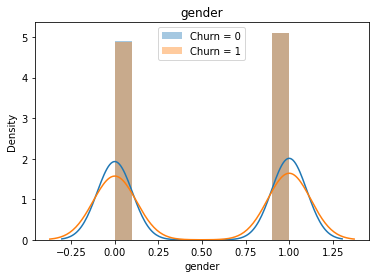

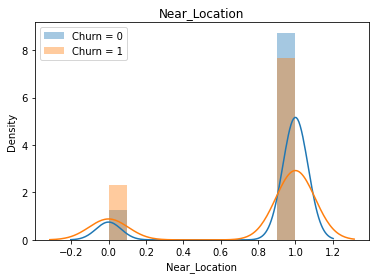

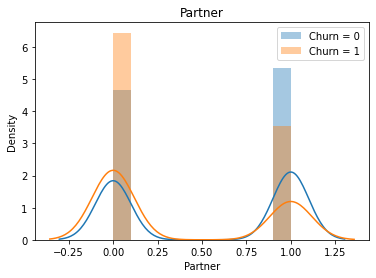

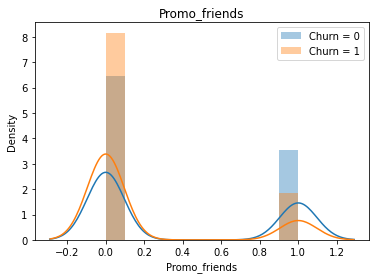

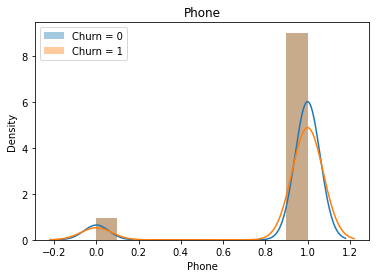

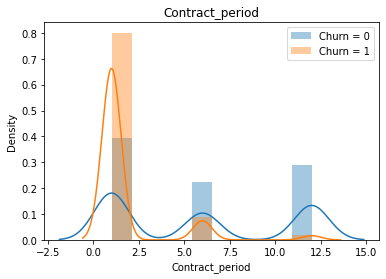

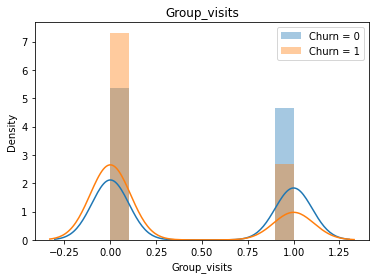

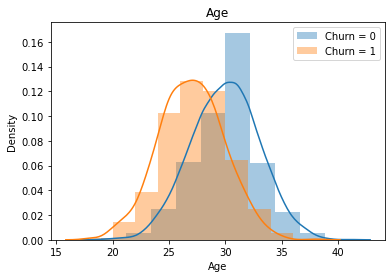

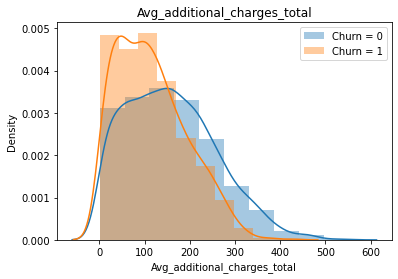

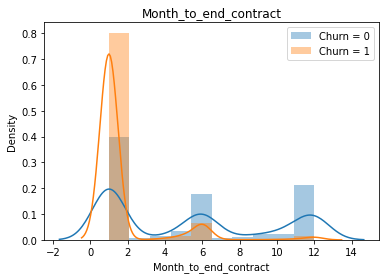

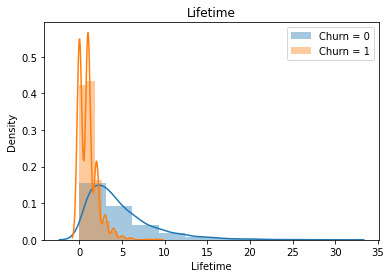

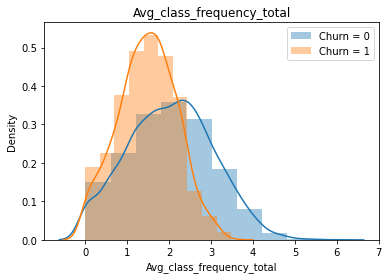

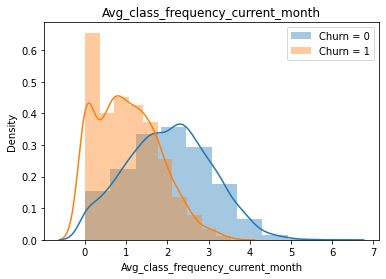

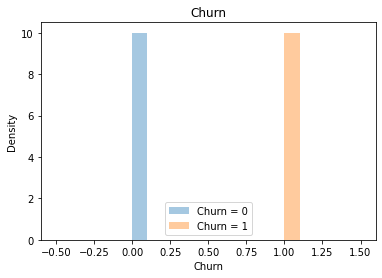

In [9]:
warnings.filterwarnings("ignore")
def feat_hist(dataframe, column_to_group, column_to_plot):
 
    for c in column_to_plot:
        for cl in dataframe[column_to_group].unique():
            sns.distplot(dataframe[dataframe[column_to_group]==cl][c], 
                         label='{} = {}'.format(column_to_group, str(cl)), bins = 10)
        plt.title(c)
        plt.legend()
        plt.show()
 
feat_hist(data, 'Churn', data.columns)

### Correlation matrix

In [10]:
data.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


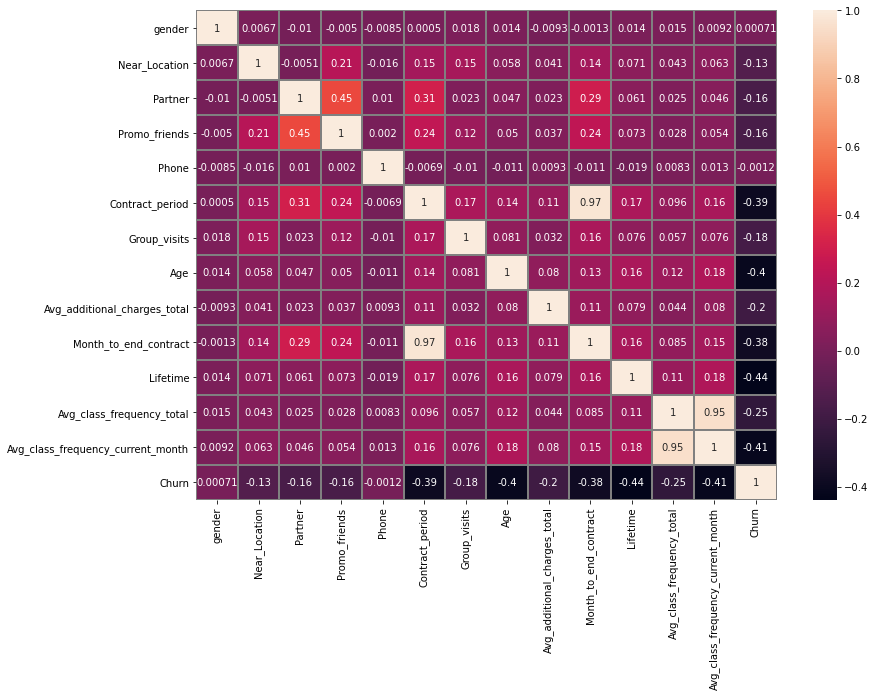

In [11]:
plt.figure(figsize=(13, 9))
ax = sns.heatmap(data.corr(), annot = True, linewidths=1, linecolor='gray') 
plt.show()

Recent visitors are more likely to leave the fitness center (corr = -0.44), the older the visitor, the more likely he/she will leave (corr = -0.4), another strong sign that a person will leave is rare attendance as in the current month, and as a whole for the entire period

## Building customer churn prediction model

In [12]:
#divide our data into features (matrix X) and target variable (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

#divide the model into training and validation set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train StandartScaler on a training set
scaler = StandardScaler()
scaler.fit(X_train)

# Transform training and validation datasets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Training the model on a train set in two ways: logistic regression and random forest.

In [13]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [14]:
lr_model = LogisticRegression(random_state=0)

lr_model.fit(X_train_st, y_train)

lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Metrics for the Logistic Regression Model:',
)

Metrics for the Logistic Regression Model:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97


In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

rf_model.fit(X_train_st, y_train)

rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Metrics for the random forest model:',
)

Metrics for the random forest model:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97


## Сlient clustering

In [16]:
scaler = StandardScaler() 
x_sc = scaler.fit_transform(data.drop(columns = ['Churn']))

In [17]:
linked = linkage(x_sc, method = 'ward') 

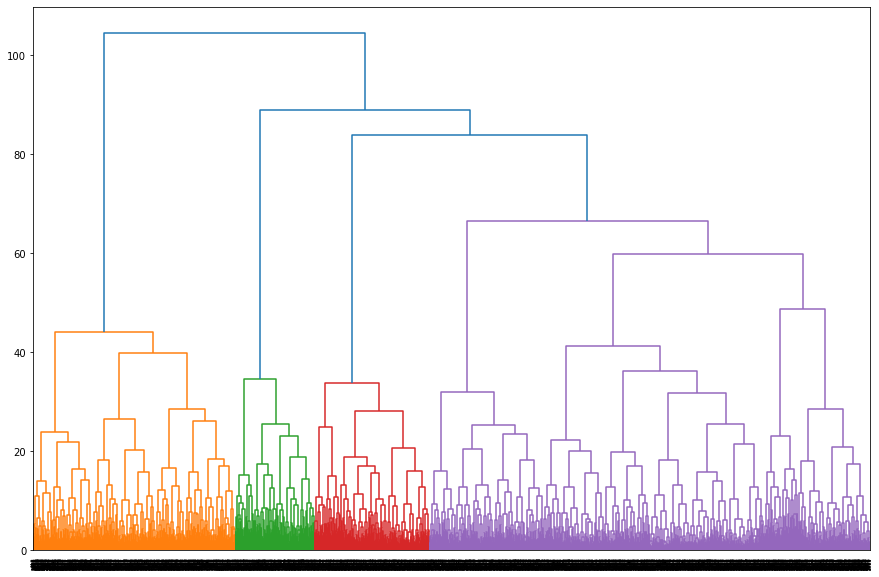

In [18]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

In [19]:
km = KMeans(n_clusters = 5, random_state = 0) 
labels = km.fit_predict(x_sc)

In [20]:
silhouette_score(x_sc, labels) 

0.11807475877213293

In [21]:
data['cluster_km'] = labels
data.groupby(['cluster_km']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,0.480787,0.812559,0.000000,0.086223,1.000000,1.866917,0.325211,28.145267,131.369042,1.791003,2.345829,1.325865,1.086883,0.550141
2,0.559567,0.858002,0.338147,0.197353,0.998797,2.730445,0.448857,30.196149,164.579011,2.519856,5.010830,2.928140,2.934140,0.048135
3,0.509603,0.750320,1.000000,0.451985,1.000000,2.554417,0.303457,28.499360,129.812508,2.370038,2.832266,1.355379,1.176172,0.395647
4,0.495726,0.943376,0.752137,0.541667,1.000000,11.352564,0.564103,29.993590,164.563799,10.376068,4.817308,2.028169,2.020129,0.023504


In [22]:
features_binary = data[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']].columns
features_numbers = (data[['Lifetime', 'Avg_additional_charges_total', 'Contract_period', 
                          'Month_to_end_contract', 'Avg_class_frequency_total',
                          'Avg_class_frequency_current_month', 'Age']].columns)

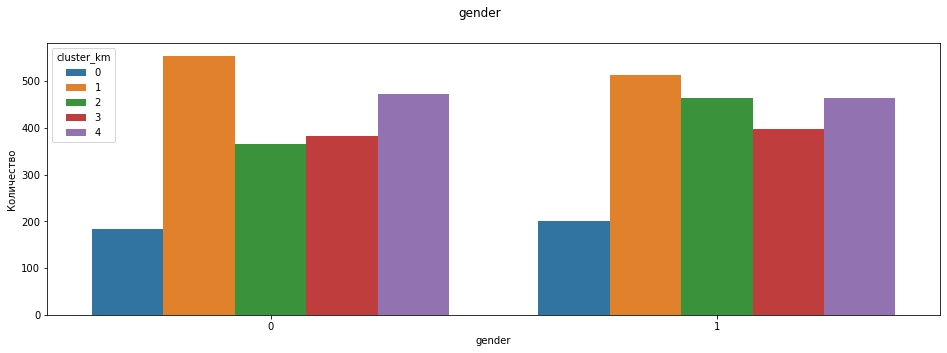

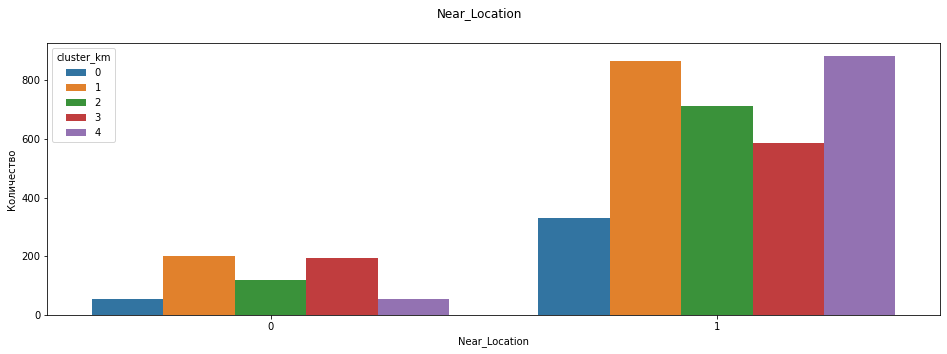

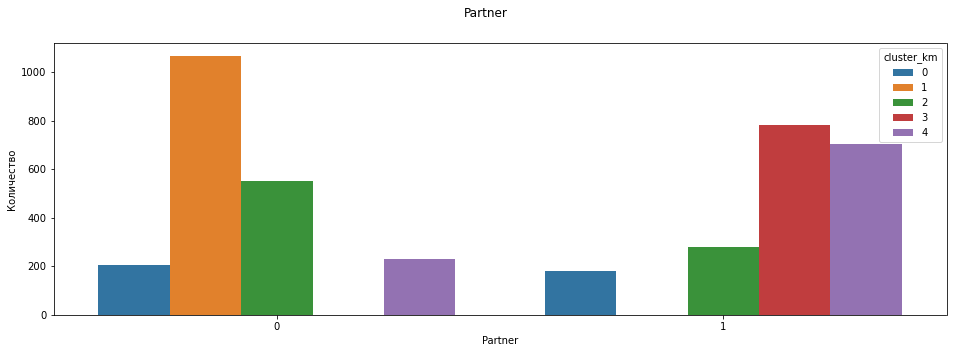

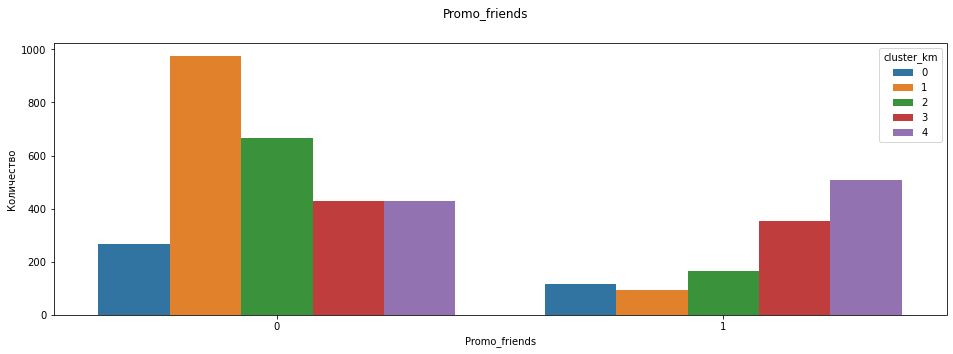

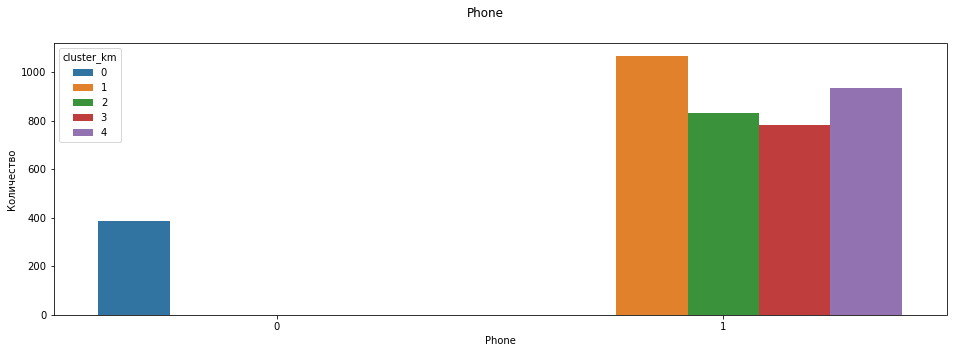

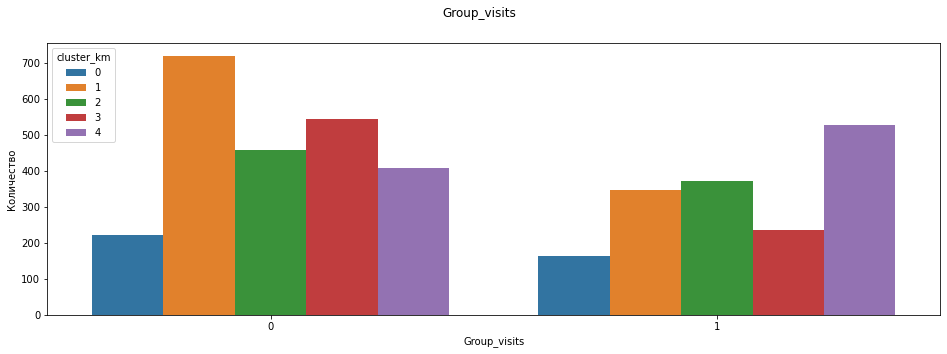

In [23]:
for column in features_binary:
    plt.subplots(figsize = (16,5))
    sns.countplot(data = data, x = column, hue = 'cluster_km')
    plt.suptitle(column)
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.show()

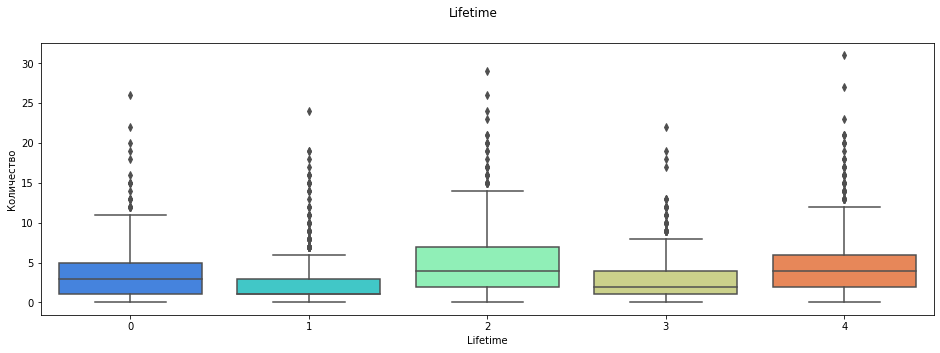

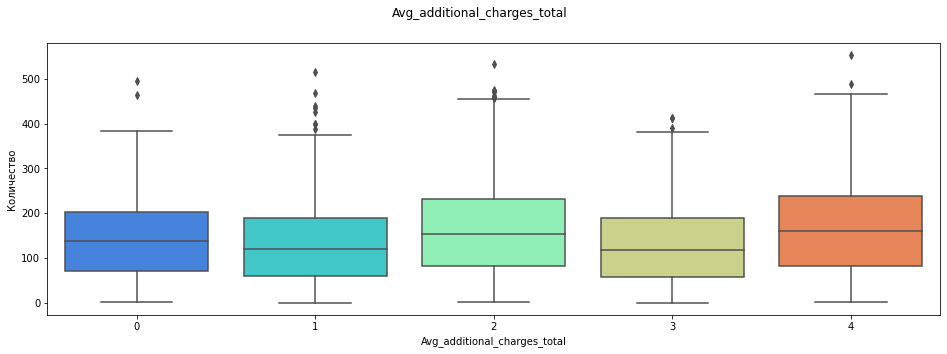

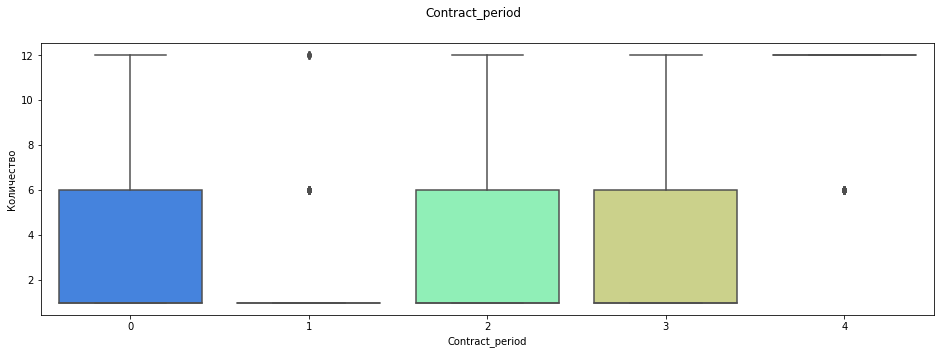

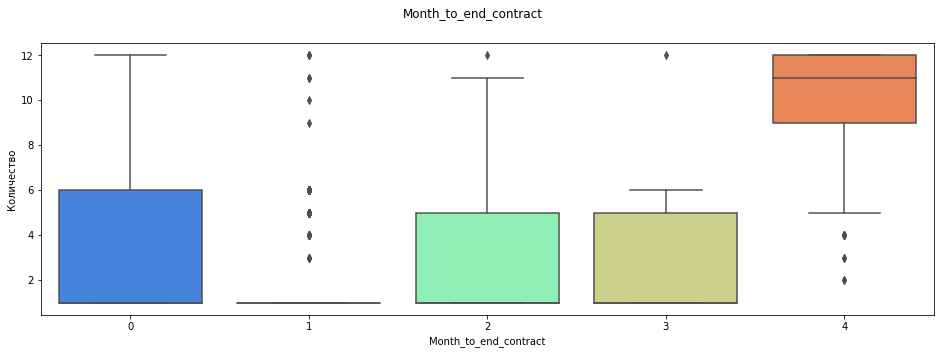

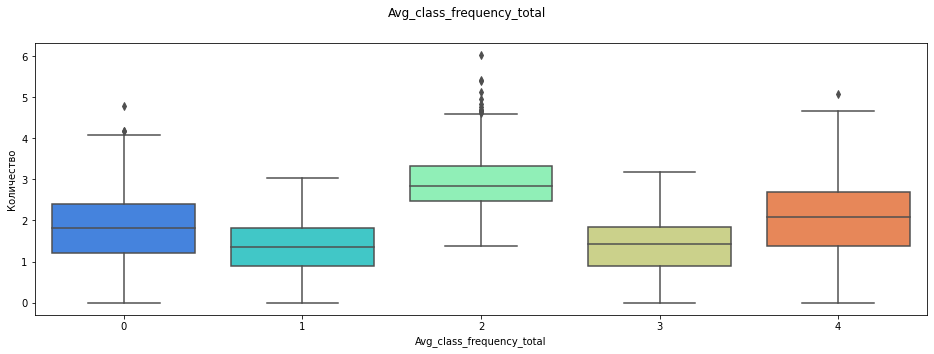

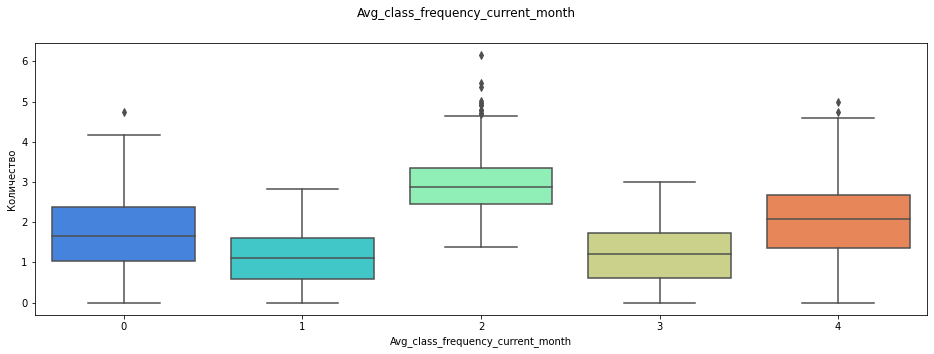

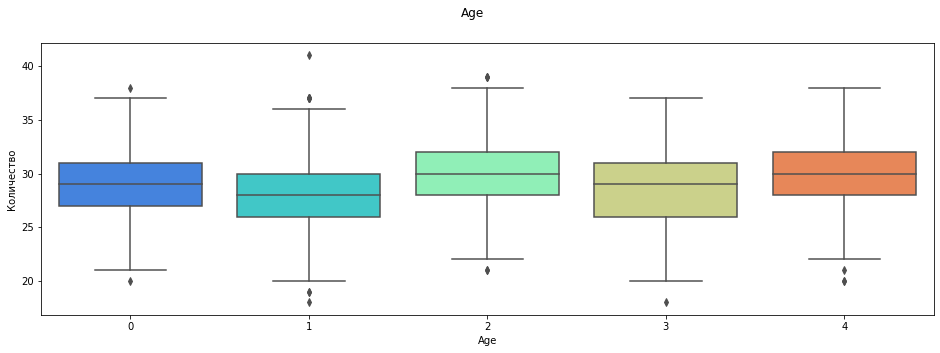

In [24]:
for column in features_numbers:
    plt.subplots(figsize = (16,5))
    sns.boxplot(x='cluster_km', y=column, data=data, palette='rainbow') 
    plt.suptitle(column)
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.show()

In [25]:
data.groupby('cluster_km')['Churn'].mean()

cluster_km
0    0.267532
1    0.550141
2    0.048135
3    0.395647
4    0.023504
Name: Churn, dtype: float64

## Conclusion

Taking into account what factors were significant in customer churn, the following actions can be proposed:

- The outflow of those who do not live or work in the area of the fitness center: if it is possible to provide free parking at the fitness center for a couple of hours (for example, for those who buy a subscription for a long time)
- The outflow of those who do not go to group classes: to improve the variety of group activities, to find a more convenient time for group classes
- The outflow of those who will soon end their subscription (clients often do not stay in the fitness center after the expiration of the subscription period): before the expiration of the subscription period, start sending renewal offers, possibly special promotions.